## **Talbot Effect**
The Talbot effect is a phenomenon that occurs with objects having a periodic grating structure when a beam of light is incident upon them. When observing the produced image at a certain distance and its odd multiples (which depend on the grating parameters and the incident wave's energy), a self-image of the grating pattern is observed – essentially, the same grating pattern. This distance is known as the Talbot distance.

The Talbot distance is determined by the grating period, and the wavelength of the incident wave, following this formula:
$$d_m=2\frac{m}{\lambda}p^2\quad \text{m = 1,2,3...}$$

In the following code lines, you can experiment and observe the extent to which the program is capable of simulating the Talbot effect.

The adjustable parameters are:

*  **n** = number of pixels the image will have (n x n).
*  **pixel_size** = size of each pixel, expressed in $\mu m$.
*  **Beam_distribution** = 'Plane' or 'Conical'

*  **design_energy** = design energy for the Grating (energy to calculate Talbot distance).
*  **period** = grating period in $\mu m$.
*  **DC** = Duty Cycle of the Grating.
*  **bar_height** = height of the bars of the Grating (microns). 
*  **Talbot_multiple** = propagation distance is Talbot_distance*Talbot_multiple

*  **multiples** = Multiples of Talbot Distance to be shown. 
*  **iterations** = Number of times the simulation will be done.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.experiments as exp
import src.PCSim.Geometry as geom
import src.PCSim.Objects as obj
import src.PCSim.source as source
import src.PCSim.utils as utils
import src.PCSim.detector as detector
from PIL import Image


n = 3000

DSO = 1
pixel_size = 1
Beam_distribution = 'Plane'
detector_pixel_size = 1 # micron
detector_FWHM = 1 # microns
design_energy = 29 #keV
period = 100 #um
bar_height = 60 #um
Talbot_multiple = 1

DC = 0.5

design_wavelength = 1.23984193/(1000*design_energy) # um
MyObject1 = obj.Grating(n , period, DC, pixel_size, 'Au', DSO, bar_height, 'custom', design_energy = design_energy)
Talbot_distance = MyObject1.get_Talbot_distance()
propagating_distance = Talbot_distance * Talbot_multiple
DSD = propagating_distance + DSO

MyGeometry = geom.Geometry(DSD)
MySource = source.Source((1,1),'Mono', design_energy, Beam_distribution, pixel_size)
MyObject1 = obj.Grating(n , period, DC, pixel_size, 'Au', DSO, bar_height, 'custom',design_energy = design_energy)
MyDetectorIdeal = detector.Detector('Ideal', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
MyDetectorRealistic = detector.Detector('Realistic', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
Sample = [MyObject1]



Intensity = exp.Experiment_Inline(n, MyGeometry, MySource, MyDetectorIdeal,Sample)

#Intensity_detector = utils.convolve(PSF_detector, Intensity)
#Intensity_detector = MyDetector.downsample_image(Intensity)

Intensity_detector = MyDetectorRealistic.applyDetector(Intensity, gaussian_sigma=0.01)

fig, axs = plt.subplots(1, 2, figsize=(12,5))

im = axs[0].imshow(Intensity_detector, cmap='gray')
axs[0].set_title('Intensity Detector')
fig.colorbar(im, ax=axs[0])

axs[1].plot(Intensity_detector[n//2, :])
axs[1].set_title('Profile')
axs[1].set_xlabel('Pixel')
axs[1].set_ylabel('Intensity')

plt.tight_layout()
plt.show()




: 

## **Fractional Talbot Effect**
Obtaining phase-contrast images using gratings is based on the Talbot effect. 

When the grating introduce a phase to the wavefront, at some distances called fractional Talbot distances the self-image of the grating appears.

The fractional Talbot distance is determined by the type of grating, its period, and the wavelength of the incident wave, following this formula:
$$d_m=\frac{m}{2\lambda}\left(\frac{p}{\eta}\right)^2\quad \text{m = 1,3,5...}$$
The parameter $\eta$ depends on the phase introduced by the grating, as follows:
$$\phi = \eta\cdot \pi/2$$
Thus, if we have a grating that introduces a phase of $\pi/2$, the value of $\eta$ is 1; if we have a grating introducing a phase equal to $\pi$, the value of $\eta$ is 2.
For gratings that introduce no phase or are absorptive, the Talbot distance is defined as follows:
$$d_m=m\frac{2p^2}{\lambda}\quad \text{m = 1,3,5...}$$
In the following code lines, you can experiment and observe the extent to which the program is capable of simulating the Talbot effect.

The adjustable parameters are:

*  **n** = number of pixels the image will have (n x n).
*  **pixel_size** = size of each pixel, expressed in $\mu m$.
*  **Energy** = beam energy in keV.
*  **Period** = grating period in $\mu m$.
*  **DC** = Duty Cycle of the Grating.
*  **multiples** = Multiples of Talbot Distance to be shown. 
*  **iterations** = Number of times the simulation will be done.
*  **Thickness** = grating thickness in $\mu m$.
*  **eta** = the value of $\eta$, dimensionless, taking values from [1,2]. If the option of 0 is chosen, the grating introduces no phase shift.
*  **Resolution** = Refers to the detector's half-width at half-maximum (FWHM) of the point spread function (PSF), measured in $\mu m$.
First, let's define the parameters on which the simulation will depend.

Energies: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


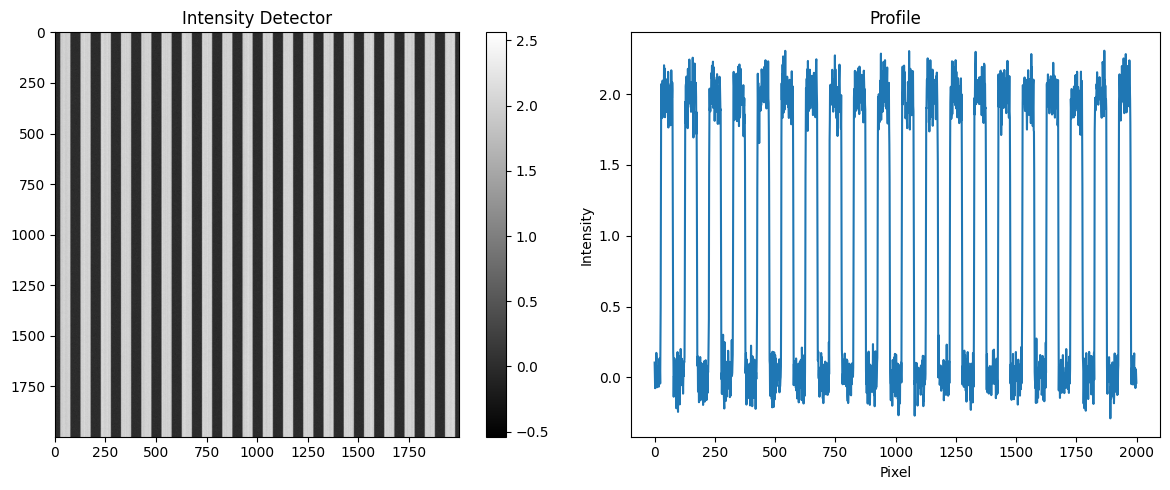

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))
import src.PCSim.experiments as exp
import src.PCSim.Geometry as geom
import src.PCSim.Objects as obj
import src.PCSim.source as source
import src.PCSim.utils as utils
import src.PCSim.detector as detector
from PIL import Image


n = 2000

DSO = 1
pixel_size = 1
Beam_distribution = 'Plane'
detector_pixel_size = 1 # micron
detector_FWHM = 1 # microns
design_energy = 29 #keV
period = 200 #um
bar_height = 60 #um
Talbot_multiple = 9
grating_type = 'phase_pi'
DC = 0.5


MyObject1 = obj.Grating(n , period, DC, pixel_size, 'Si', DSO, grating_type = grating_type, design_energy = design_energy)
design_wavelength = 1.23984193/(1000*design_energy) # um

if grating_type == 'phase_pi':
    Talbot_distance = MyObject1.get_Talbot_distance()
    propagating_distance = Talbot_distance * Talbot_multiple /16
elif grating_type == 'phase_pi_2':
    Talbot_distance = MyObject1.get_Talbot_distance()
    propagating_distance = Talbot_distance * Talbot_multiple /4



MyObject1.update_step(2)

DSD = propagating_distance + DSO

MyGeometry = geom.Geometry(DSD)
MySource = source.Source((1,1),'Mono', design_energy, Beam_distribution, pixel_size)
MyDetectorIdeal = detector.Detector('Ideal', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
MyDetectorRealistic = detector.Detector('Realistic', detector_pixel_size, detector_FWHM, 'gaussian', pixel_size)
Sample = [MyObject1]



Intensity = exp.Experiment_Inline(n, MyGeometry, MySource, MyDetectorIdeal,Sample)

#Intensity_detector = utils.convolve(PSF_detector, Intensity)
#Intensity_detector = MyDetector.downsample_image(Intensity)

Intensity_detector = MyDetectorRealistic.applyDetector(Intensity, gaussian_sigma=0.1)

fig, axs = plt.subplots(1, 2, figsize=(12,5))

im = axs[0].imshow(Intensity_detector, cmap='gray')
axs[0].set_title('Intensity Detector')
fig.colorbar(im, ax=axs[0])

axs[1].plot(Intensity_detector[n//2, :])
axs[1].set_title('Profile')
axs[1].set_xlabel('Pixel')
axs[1].set_ylabel('Intensity')

plt.tight_layout()
plt.show()




# Tabot carpet
There is a function inside **check_Talbot.py** that enables us to perform a simulation of the Talbot effect along the propagation distance (Talbot carpet). One can observe, over one Talbot distance, that for gratings introducing phase shifts (either $\pi$ or $\pi/2$), the self-image of the grid is observed at fractions of the Talbot distance.


Energy: 100%|██████████| 59/59 [05:15<00:00,  5.35s/it]


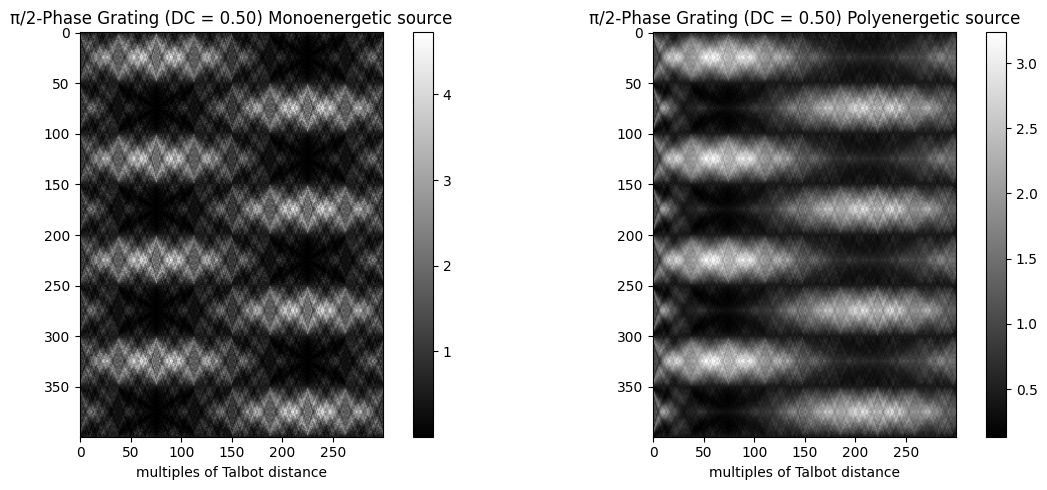

In [ ]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))

import src.PCSim.check_Talbot as check_Talbot
import matplotlib.pyplot as plt
import src.PCSim.source as source

n = 400
pixel_size = 1 #um
Design_energy = 17.5 #keV
Period = 100.0 # um
DC = 0.5
Talbot_multiple = 1 #Multiples of Talbot Distance defined as Dt = 2*p**2/wavelength
steps = 300


MySource = source.Source((1,1), 'Mono', Design_energy, 'Plane', pixel_size)
MySourcePoly = source.Source((1,1), 'AAPM_Mo_Mo', Design_energy, 'Plane', pixel_size)

Intensities_pi_2_Mono = check_Talbot.Talbot_carpet(n, MySource, Period,DC, Talbot_multiple, steps, 'phase_pi_2', pixel_size, Design_energy) # For pi/2-phase gratings
Intensities_pi_2_Poly = check_Talbot.Talbot_carpet(n, MySourcePoly, Period,DC, Talbot_multiple, steps, 'phase_pi_2', pixel_size, Design_energy)

#arr_out = np.asarray(Intensities_pi_2_Mono, dtype=np.float32)
#tifffile.imwrite('pi_2_Mono', arr_out)

#arr_out = np.asarray(Intensities_pi_2_Poly, dtype=np.float32)
#tifffile.imwrite('pi_2_Poly', arr_out)

fig, axs = plt.subplots(1, 2, figsize=(12,5))

im = axs[0].imshow(Intensities_pi_2_Mono, cmap='gray')
axs[0].set_title(f'π/2-Phase Grating (DC = {DC:.2f}) Monoenergetic source')
axs[0].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[0])

im = axs[1].imshow(Intensities_pi_2_Poly, cmap='gray')
axs[1].set_title(f'π/2-Phase Grating (DC = {DC:.2f}) Polyenergetic source')
axs[1].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[1])

plt.tight_layout()
plt.show()



Energy: 100%|██████████| 59/59 [05:10<00:00,  5.27s/it]


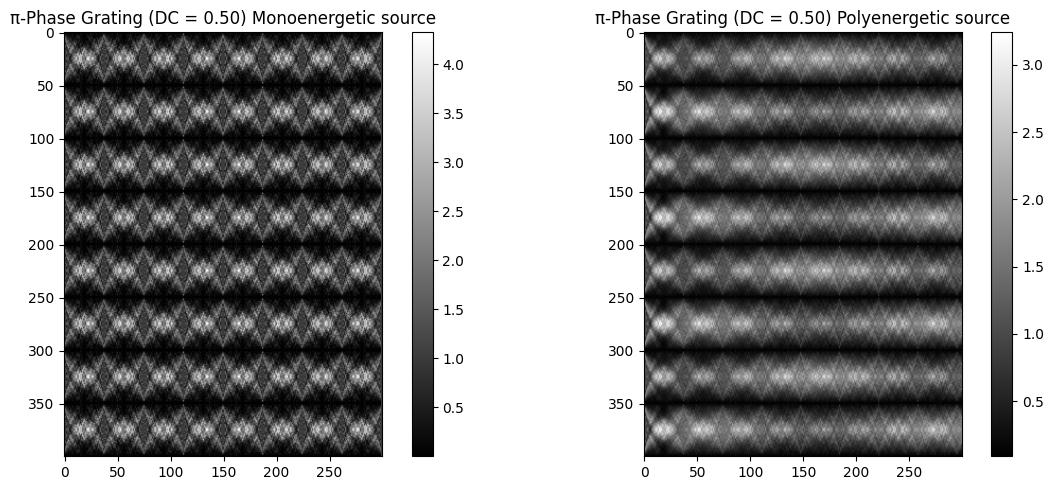

In [ ]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))

import src.PCSim.check_Talbot as check_Talbot
import matplotlib.pyplot as plt
import src.PCSim.source as source

n = 400
pixel_size = 1 #um

Design_energy = 17.5 #keV
Period = 100.0 # um
DC = 0.5
Talbot_multiple = 1 #Multiples of Talbot Distance defined as Dt = 2*p**2/wavelength
steps = 300


MySource = source.Source((1,1), 'Mono', Design_energy, 'Plane', pixel_size)
MySourcePoly = source.Source((1,1), 'AAPM_Mo_Mo', Design_energy, 'Plane', pixel_size)

Intensities_pi_Mono = check_Talbot.Talbot_carpet(n, MySource, Period,DC, Talbot_multiple, steps, 'phase_pi', pixel_size, Design_energy) # For pi/2-phase gratings
Intensities_pi_Poly = check_Talbot.Talbot_carpet(n, MySourcePoly, Period,DC, Talbot_multiple, steps, 'phase_pi', pixel_size, Design_energy)

#arr_out = np.asarray(Intensities_pi_Mono, dtype=np.float32)
#tifffile.imwrite('pi_Mono.tif', arr_out)

#arr_out = np.asarray(Intensities_pi_Poly, dtype=np.float32)
#tifffile.imwrite('pi_Poly.tif', arr_out)

fig, axs = plt.subplots(1, 2, figsize=(12,5))

im = axs[0].imshow(Intensities_pi_Mono, cmap='gray')
axs[0].set_title(f'π-Phase Grating (DC = {DC:.2f}) Monoenergetic source')
#axs[0].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[0])

im = axs[1].imshow(Intensities_pi_Poly, cmap='gray')
axs[1].set_title(f'π-Phase Grating (DC = {DC:.2f}) Polyenergetic source')
#axs[1].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[1])

plt.tight_layout()
plt.show()


Energy: 100%|██████████| 59/59 [05:18<00:00,  5.40s/it]


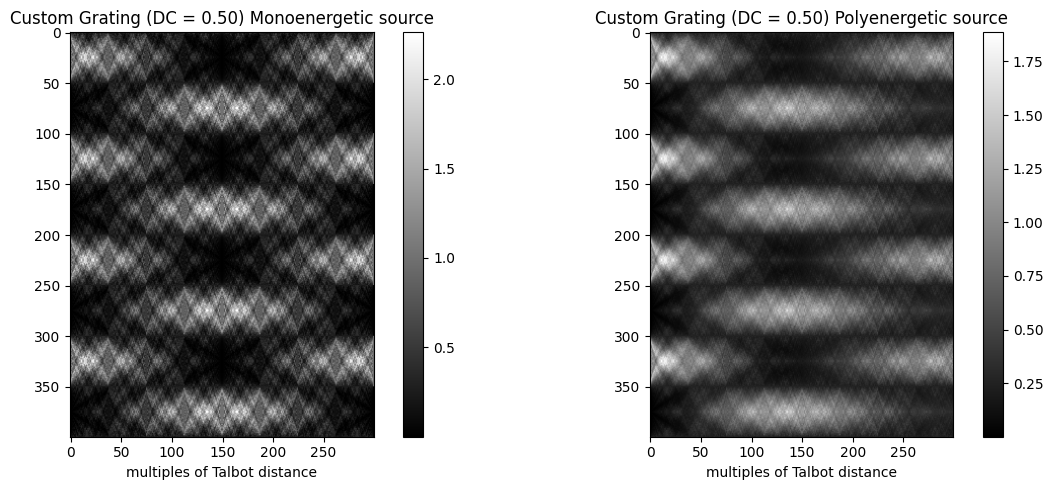

In [ ]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.path.abspath(''), os.pardir)))

import src.PCSim.check_Talbot as check_Talbot
import matplotlib.pyplot as plt
import src.PCSim.source as source

n = 400
pixel_size = 1 #um
Design_energy = 17.25 #keV
Period = 100.0 # um
DC = 0.5
Talbot_multiple = 1 #Multiples of Talbot Distance defined as Dt = 2*p**2/wavelength
steps = 300

# Spectra: 100W-Al2.708

MySourcePoly = source.Source((1,1), 'AAPM_Mo_Mo', Design_energy, 'Plane', pixel_size)
MySourceMono = source.Source((1,1), 'Mono', Design_energy, 'Plane', pixel_size)

Intensities_Mono = check_Talbot.Talbot_carpet(n, MySourceMono, Period,DC, Talbot_multiple, steps, 'custom', pixel_size, Design_energy,'Au', 100) # For custom Gratings

Intensities_Poly = check_Talbot.Talbot_carpet(n, MySourcePoly, Period,DC, Talbot_multiple, steps, 'custom', pixel_size, Design_energy,'Au', 100) # For custom Gratings

#arr_out = np.asarray(Intensities_Mono, dtype=np.float32)
#tifffile.imwrite('Abs_Mono.tif', arr_out)

#arr_out = np.asarray(Intensities_Poly, dtype=np.float32)
#tifffile.imwrite('Abs_Poly.tif', arr_out)
fig, axs = plt.subplots(1, 2, figsize=(12,5))

im = axs[0].imshow(Intensities_Mono, cmap='gray')
axs[0].set_title(f'Custom Grating (DC = {DC:.2f}) Monoenergetic source')
axs[0].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[0])

im = axs[1].imshow(Intensities_Poly, cmap='gray')
axs[1].set_title(f'Custom Grating (DC = {DC:.2f}) Polyenergetic source')
axs[1].set_xlabel('multiples of Talbot distance')
fig.colorbar(im, ax=axs[1])

plt.tight_layout()
plt.show()

